<a href="https://colab.research.google.com/github/abhijeet3922/vision-RAG/blob/main/1_search_with_colpali_late_interaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install Libraries

In [ ]:
!pip install colpali-engine==0.3.2
!pip install pdf2image

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━

In [ ]:
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 186 kB in 0s (378 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 126109 

### Load Visual Language Model (ColPali)

In [ ]:
import torch
from colpali_engine.models import ColPali, ColPaliProcessor

model_name = "vidore/colpali-v1.3"

model = ColPali.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    device_map="cuda:0",  # or "mps" if on Apple Silicon
).eval()

processor = ColPaliProcessor.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json:   0%|          | 0.00/751 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of the model checkpoint at vidore/colpaligemma-3b-pt-448-base were not used when initializing ColPali: ['model.language_model.model.embed_tokens.weight', 'model.language_model.model.layers.0.input_layernorm.weight', 'model.language_model.model.layers.0.mlp.down_proj.weight', 'model.language_model.model.layers.0.mlp.gate_proj.weight', 'model.language_model.model.layers.0.mlp.up_proj.weight', 'model.language_model.model.layers.0.post_attention_layernorm.weight', 'model.language_model.model.layers.0.self_attn.k_proj.weight', 'model.language_model.model.layers.0.self_attn.o_proj.weight', 'model.language_model.model.layers.0.self_attn.q_proj.weight', 'model.language_model.model.layers.0.self_attn.v_proj.weight', 'model.language_model.model.layers.1.input_layernorm.weight', 'model.language_model.model.layers.1.mlp.down_proj.weight', 'model.language_model.model.layers.1.mlp.gate_proj.weight', 'model.language_model.model.layers.1.mlp.up_proj.weight', 'model.language_model.model.la

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

Loading adapter weights from vidore/colpali-v1.3 led to unexpected keys not found in the model: model.language_model.model.layers.0.mlp.down_proj.lora_A.default.weight, model.language_model.model.layers.0.mlp.down_proj.lora_B.default.weight, model.language_model.model.layers.0.mlp.gate_proj.lora_A.default.weight, model.language_model.model.layers.0.mlp.gate_proj.lora_B.default.weight, model.language_model.model.layers.0.mlp.up_proj.lora_A.default.weight, model.language_model.model.layers.0.mlp.up_proj.lora_B.default.weight, model.language_model.model.layers.0.self_attn.k_proj.lora_A.default.weight, model.language_model.model.layers.0.self_attn.k_proj.lora_B.default.weight, model.language_model.model.layers.0.self_attn.o_proj.lora_A.default.weight, model.language_model.model.layers.0.self_attn.o_proj.lora_B.default.weight, model.language_model.model.layers.0.self_attn.q_proj.lora_A.default.weight, model.language_model.model.layers.0.self_attn.q_proj.lora_B.default.weight, model.language

preprocessor_config.json:   0%|          | 0.00/423 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/34.6M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

### Process PDF
*   Define Colpali class
*   Create image and query embeddings
*   Late interaction
*   Display output

In [ ]:
from pdf2image import convert_from_path
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np

In [ ]:
class colpali_class():
  def __init__(self,processor,model):
    self.processor = processor
    self.model = model

  def embed_image(self, list_of_images):
    dataset = []
    for img in list_of_images:
      images = convert_from_path(img)
      dataloader = DataLoader(images, batch_size=1, shuffle=False, collate_fn=lambda x:self.processor.process_images(x).to(self.model.device))
      for batch in tqdm(dataloader):
        with torch.no_grad():
          batch = {k: v.to(self.model.device) for k,v in batch.items()}
          embeddings = self.model(**batch)
        dataset.extend(list(torch.unbind(embeddings.to("cpu").to(torch.float32))))
    return dataset

  def embed_query(self, query):
    batch_queries = processor.process_queries(query).to(model.device)
    with torch.no_grad():
      query_embeddings = model(**batch_queries)
      query_embeddings = list(torch.unbind(query_embeddings.to("cpu").to(torch.float32)))
    return query_embeddings

  def score(self, query_embedding, dataset):
    scores = processor.score_multi_vector(query_embedding, dataset)
    scores = np.array(scores)
    matched_pages = scores.flatten().argsort()[::-1]
    return scores, matched_pages

In [ ]:
colpali_obj = colpali_class(processor, model)

In [ ]:
file_name = "sample_data/AT&T_esg_doc.pdf"

In [ ]:
dataset = colpali_obj.embed_image([file_name])

100%|██████████| 10/10 [00:27<00:00,  2.76s/it]


In [ ]:
len(dataset), dataset[0].shape

(10, torch.Size([1030, 128]))

In [ ]:
query = ['how much carbon reduction is expected in transportation?']
query_embeddings = colpali_obj.embed_query(query)

In [ ]:
len(query_embeddings), query_embeddings[0].shape

(1, torch.Size([23, 128]))

In [ ]:
scores, matched_pages = colpali_obj.score(query_embeddings, dataset)

In [ ]:
scores, matched_pages

(array([[3.082199 , 3.1061287, 3.6770835, 3.056295 , 3.17661  , 3.2092183,
         3.1738868, 2.781404 , 2.90234  , 2.8694367]], dtype=float32),
 array([2, 5, 4, 6, 1, 0, 3, 8, 9, 7]))

In [ ]:
images = convert_from_path(file_name)

In [ ]:
len(images)

10

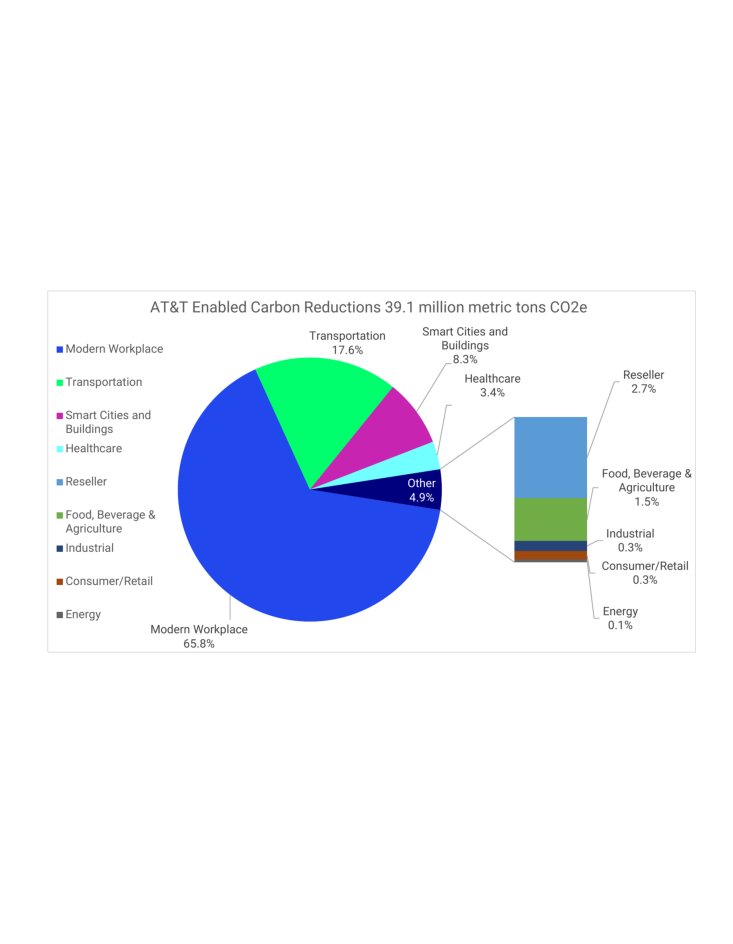

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 12))
ax.imshow(images[matched_pages[0]])
ax.axis("off")
plt.show()

### Vector DB
- Initialize faiss vector DB


In [ ]:
!pip install faiss-cpu
!pip install langchain_community
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS

In [ ]:
index = faiss.IndexFlatL2(128)

vector_store = FAISS(
    embedding_function=colpali_obj.embed_query,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

### Add embeddings to FAISS Vector DB
*   Create metadata
*   Add document to DB with metadata

In [ ]:
!mkdir sample_data/data

In [ ]:
import PyPDF2
from PIL import Image
file_name = file_name
all_images = []
for i, img in enumerate(images):
  page_name = "sample_data/data/"+str(i)+".pdf"
  img = img.resize((800,800),Image.LANCZOS)
  img.save(page_name)
  all_images.append(page_name)

all_embeddings = [l for l in dataset]
list_of_tuple = []
for img, embd in zip(all_images, all_embeddings):
  for i in range(0,1030):
    list_of_tuple.append((img, embd[i]))

metadata = []
uids = []
count=0
pdfReader = PyPDF2.PdfReader(file_name)
total_pages = len(pdfReader.pages)
for i in range(0,total_pages):
  for j in range(0,1030):
    file_name = file_name
    page_name = file_name.split("/")[-1].split(".")[0]+"_"+str(i)+".pdf"
    patch_num = j
    uid = count
    metadata.append({"file_name":file_name, "page_name": page_name, "patch_num":patch_num,"uid":uid})
    uids.append(uid)
    count += 1

In [ ]:
ids = vector_store.add_embeddings(text_embeddings= list_of_tuple, metadatas=metadata, ids = uids)

In [ ]:
#index_to_docstore_id = vector_store.index_to_docstore_id
#uid_to_del = []
#for i in range(0,len(index_to_docstore_id)):
#  uid_to_del.append(vector_store.docstore._dict[index_to_docstore_id[i]].metadata['uid'])
#vector_store.delete(ids=uid_to_del)

### Do similarity search


*   Match each word of query with patch in DB
*   Get all the page names and sort based on frequency of occurance



In [ ]:
page_name_list = []
for i in range(0,query_embeddings[0].shape[0]):
    vec = query_embeddings[0][i].tolist()
    results = vector_store.similarity_search_by_vector(vec, k=3)
    for doc in results:
       page_name_list.append(doc.metadata['page_name'])

In [ ]:
unique_list_items = set(page_name_list)
page_dict={}

for list_item in unique_list_items:
    page_dict[list_item]=page_name_list.count(list_item)
sorted_page_dict = dict(sorted(page_dict.items(),key=lambda item: item[1], reverse=True))
top_pages = list(sorted_page_dict.keys())
top_pages

['AT&T_esg_doc_2.pdf',
 'AT&T_esg_doc_3.pdf',
 'AT&T_esg_doc_0.pdf',
 'AT&T_esg_doc_6.pdf',
 'AT&T_esg_doc_5.pdf',
 'AT&T_esg_doc_9.pdf',
 'AT&T_esg_doc_1.pdf',
 'AT&T_esg_doc_4.pdf',
 'AT&T_esg_doc_7.pdf',
 'AT&T_esg_doc_8.pdf']

### Generation model
*   Model setup
*   Call model with retriever output



In [ ]:
!pip install qwen-vl-utils==0.0.08

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 32.5 MB/s eta 0:00:00


In [ ]:
from transformers import Qwen2_5_VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info

# default: Load the model on the available device(s)
gen_model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2.5-VL-3B-Instruct", torch_dtype="auto", device_map="auto"
)
# default processer
gen_processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-3B-Instruct")

config.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00002-of-00002.safetensors:   0%|          | 0.00/3.53G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/216 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/5.70k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [ ]:
all_images, top_pages

(['sample_data/data/0.pdf',
  'sample_data/data/1.pdf',
  'sample_data/data/2.pdf',
  'sample_data/data/3.pdf',
  'sample_data/data/4.pdf',
  'sample_data/data/5.pdf',
  'sample_data/data/6.pdf',
  'sample_data/data/7.pdf',
  'sample_data/data/8.pdf',
  'sample_data/data/9.pdf'],
 'AT&T_esg_doc_2.pdf')

In [ ]:
def get_page_numbers(all_images, page_name):

 page_num = page_name.split("_")[-1].split(".")[0]
 local_page_name = "sample_data/data/"+str(page_num)+".pdf"
 return int(page_num), local_page_name

In [ ]:
page_num, local_page_name = get_page_numbers(all_images, top_pages[0])
print(page_num)

2


In [ ]:
messages = [
    {"role": "user",
     "content": [
         {"type": "image",
          "image": images[page_num],
          "resized_height": 800,
          "resized_width": 800,
         },
        {"type": "text", "text": query}]},
]

In [ ]:
# Preparation for inference
text = gen_processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

image_inputs, video_inputs = process_vision_info(messages)
inputs = gen_processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

In [ ]:

# Inference: Generation of the output
import torch
with torch.no_grad():
  generated_ids = gen_model.generate(**inputs, max_new_tokens=64)

generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = gen_processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text)

OutOfMemoryError: CUDA out of memory. Tried to allocate 692.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 182.12 MiB is free. Process 15852 has 14.56 GiB memory in use. Of the allocated memory 13.81 GiB is allocated by PyTorch, and 637.59 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)